In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
### Create the lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

2025-11-19 12:56:05.810847: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 12:56:05.811493: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-19 12:56:05.922263: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-19 12:56:12.488629: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


In [5]:
df1 = df.reset_index()['Close']

In [6]:
df1

0        58.747143
1        59.062859
2        59.718571
3        60.342857
4        60.247143
           ...    
2006    284.000000
2007    284.269989
2008    289.910004
2009    289.799988
2010    291.519989
Name: Close, Length: 2011, dtype: float64

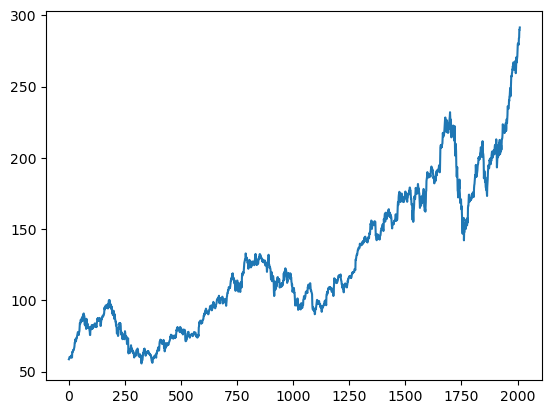

In [7]:
plt.plot(df1)

In [8]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1.shape

(2011, 1)

In [10]:
df1

array([[0.01254462],
       [0.01388393],
       [0.01666555],
       ...,
       [0.99317022],
       [0.99270351],
       [1.        ]])

In [11]:
train_size = int(len(df1) * 0.65) 
test_size = len(df1) - train_size
train, test = df1[0: train_size, :], df1[train_size : len(df1), :1]

In [12]:
train_size, test_size

(1307, 704)

In [13]:
train

array([[0.01254462],
       [0.01388393],
       [0.01666555],
       ...,
       [0.3535825 ],
       [0.35383702],
       [0.3529462 ]])

In [14]:
def create_dataset(dataset , time_step = 1):
    dataX, dataY = [] , []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
x_train, y_train = create_dataset(train, time_step)
x_test, y_test = create_dataset(test, time_step)

In [16]:
print(x_train.shape) , print(y_train.shape)

(1206, 100)
(1206,)


(None, None)

In [17]:
print(x_test.shape) , print(y_test.shape)

(603, 100)
(603,)


(None, None)

In [18]:
#reshape input to be [sample, time_steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (100, 1)))
model.add(LSTM(50 , return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

2025-11-19 12:56:16.150238: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 0.0063 - val_loss: 0.0188
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 9.7227e-04 - val_loss: 0.0027
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 4.3875e-04 - val_loss: 0.0028
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 3.7444e-04 - val_loss: 0.0021
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 3.5189e-04 - val_loss: 0.0023
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 3.3215e-04 - val_loss: 0.0027
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 3.4028e-04 - val_loss: 0.0024
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - loss: 3.0800e-04 - val_loss: 0.0022
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 3.1198e-04 - val_loss: 0.0018
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 3.0076e-04 - val_loss: 0.0020
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 2.7186e-04 - val_loss: 0.0022


In [22]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step  
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [23]:
#Transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
rmse_train_score = np.sqrt(mean_squared_error(y_train, train_predict))
print(f"RMSE Score for Train : {rmse_train_score: .2f}")

RMSE Score for Train :  99.05


In [25]:
rmse_test_score = np.sqrt(mean_squared_error(y_test, test_predict))
print(f"RMSE Score for Test: {rmse_test_score: .2f}")

RMSE Score for Test:  196.34


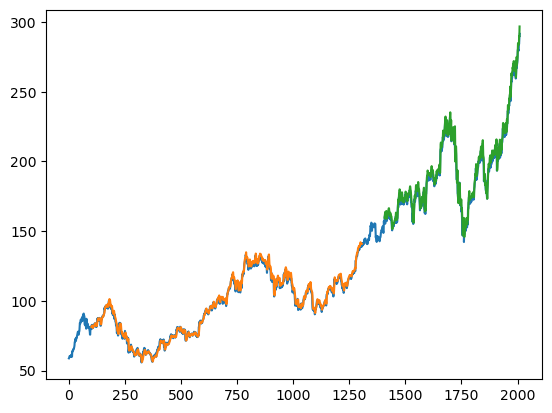

In [26]:
#shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[: , :] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df) - 1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Green Line represent our predicted output for test data
#Orange Line represent our train data
#Blue Line represents our original dataset

### Predicting Future 30 Days

In [27]:
len(test)

704

In [28]:
x_input = test[604:].reshape(1, -1)

In [29]:
x_input.shape

(1, 100)

In [30]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [31]:
temp_input

[0.6263097591130407,
 0.6159589843953159,
 0.6137954539750792,
 0.6498112577853268,
 0.6234251324867499,
 0.6191405906320242,
 0.6393331636702921,
 0.6556654344715787,
 0.6557078346773597,
 0.66537990915267,
 0.6646163575929931,
 0.6229584926632243,
 0.6392907634645109,
 0.6294065691803283,
 0.6352182820286743,
 0.6499809179984346,
 0.6488355821746361,
 0.6359394376247114,
 0.6507445331902362,
 0.6680948798079944,
 0.6680100200064492,
 0.6718703816334135,
 0.6826029957631017,
 0.711831347482188,
 0.7097102766577157,
 0.6912993988698628,
 0.6961778363132991,
 0.6995715623588799,
 0.7083528252671867,
 0.7006745616090218,
 0.6869723974193729,
 0.6911721388625363,
 0.6867602776105006,
 0.7009714775873148,
 0.696135436107518,
 0.6915963784802805,
 0.713443382519495,
 0.7160734891311324,
 0.6921902783111327,
 0.7000806617781696,
 0.7263394676794366,
 0.7265515874883088,
 0.7152674737335496,
 0.7264243274809821,
 0.7394052682003276,
 0.7653672217554264,
 0.7639248426890854,
 0.761591715687865

In [32]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):
    if(len(temp_input) > 100) :
        x_input = np.array(temp_input[1:])
        print(" {} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input , verbose = 0)
        print(" {} day input {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]      

        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1

print(lst_output)

[1.0253046]
101
 1 day input [0.61595898 0.61379545 0.64981126 0.62342513 0.61914059 0.63933316
 0.65566543 0.65570783 0.66537991 0.66461636 0.62295849 0.63929076
 0.62940657 0.63521828 0.64998092 0.64883558 0.63593944 0.65074453
 0.66809488 0.66801002 0.67187038 0.682603   0.71183135 0.70971028
 0.6912994  0.69617784 0.69957156 0.70835283 0.70067456 0.6869724
 0.69117214 0.68676028 0.70097148 0.69613544 0.69159638 0.71344338
 0.71607349 0.69219028 0.70008066 0.72633947 0.72655159 0.71526747
 0.72642433 0.73940527 0.76536722 0.76392484 0.76159172 0.75756163
 0.761422   0.76621564 0.78360838 0.78127525 0.79493489 0.79663178
 0.80935821 0.8198363  0.79540153 0.79527427 0.81860605 0.84855562
 0.85568239 0.85411282 0.85457939 0.86386969 0.86688171 0.8756205
 0.8746023  0.88525012 0.87748706 0.89072252 0.89640697 0.89297085
 0.87982018 0.87481449 0.87383875 0.89331016 0.88448657 0.89954612
 0.89704327 0.88393507 0.86395461 0.87366903 0.88995884 0.91172104
 0.89564342 0.90226115 0.91197556 0

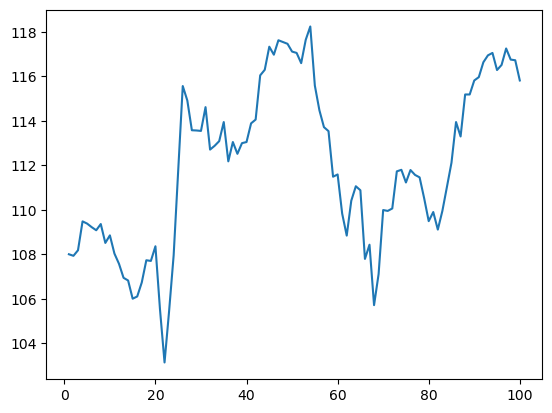

In [33]:
day_new = np.arange(1, 101)
# day_pred = np.arange(101, 131)
y1 = scaler.inverse_transform(df1[1158:1158+100])
plt.plot(day_new, y1)

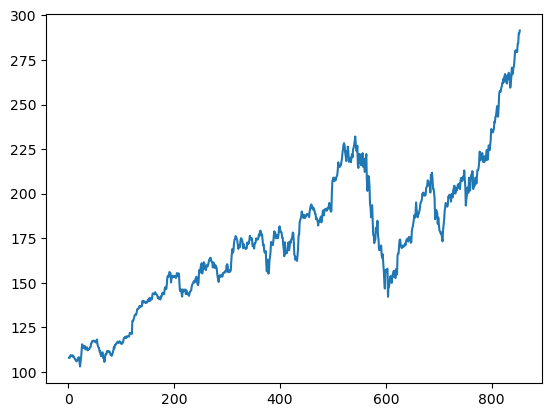

In [34]:
day_new = np.arange(1, 854)     
y1 = scaler.inverse_transform(df1[1158:])

plt.plot(day_new, y1)

In [35]:
print(len(day_new))  # Should print 853 or match the length of df1[1158:]
print(len(scaler.inverse_transform(df1[1158:])))

853
853


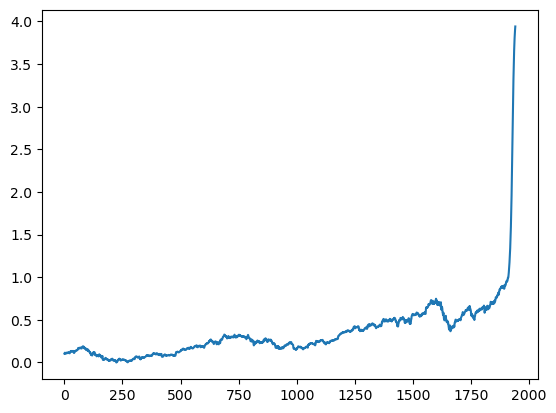

In [36]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[100:])